In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# did not work for me in our environment

In [3]:
from pathlib import Path
data_folder = Path("/Volumes/dohmen_soep/SOEP-CORE.v36eu_STATA/Stata/raw")

file_names = ['vp', 'wp', 'xp', 'zp', 'bap', 'bbp', 'bdp', 'bfp', 'bgp', 'bip']
data_folder = Path("/Volumes/dohmen_soep/SOEP-CORE.v36eu_STATA/Stata/raw")

file_paths = [data_folder / f"{file_name}.dta" for file_name in file_names]

file_paths_2 = [data_folder / f"{file_name}gen.dta" for file_name in file_names]

data_folder_2 = Path("/Volumes/dohmen_soep/data_wave37/raw")

file_to_open_20 = data_folder_2/ "bkp.dta"
file_to_open202 = data_folder_2/ 'bkpgen.dta'

data_folder_3 = Path("/Volumes/dohmen_soep/SOEP-CORE.v36eu_STATA/Stata")
file_abroad = data_folder_3/ "abroad.dta"


#data_folder_Emir = Path("/Users/m.emirkavukcu/Desktop/Research Module in Management and Applied Microeconomics/ResearchModule/Data-SOEP/SOEP-CORE.v36eu_STATA/Stata/raw")
#file_paths = [data_folder_Emir / f"{file_name}.dta" for file_name in file_names]
#file_paths_2 = [data_folder_Emir / f"{file_name}gen.dta" for file_name in file_names]
#data_folder_3_Emir = Path("/Users/m.emirkavukcu/Desktop/Research Module in Management and Applied Microeconomics/ResearchModule/Data-SOEP/SOEP-CORE.v36eu_STATA/Stata")
#data_folder_2_Emir = Path("/Users/m.emirkavukcu/Desktop/Research Module in Management and Applied Microeconomics/ResearchModule/Data-SOEP/data_wave37/raw")
#file_paths_2 = [data_folder_Emir / f"{file_name}gen.dta" for file_name in file_names]
#file_abroad = data_folder_3_Emir/ "abroad.dta"
#file_to_open_20 = data_folder_2_Emir/ "bkp.dta"
#file_to_open202 = data_folder_2_Emir/ 'bkpgen.dta'

In [4]:
data = pd.read_stata(file_paths[0], columns=["pid","hid", "syear", "vp14702", "vp14701", "vp9201", "vp0102", "vp12602", "vp12603", "vp12605", "vp7002", "vp7003", "vp100a03", "vp2301"]).set_index(['pid', 'hid'])
df_05 = data.rename(columns={'vp14701': 'gender', 'vp0102': 'satisfaction_work', 'vp12602': 'take_revenge', 'vp12603': 'similar_problems', 'vp12605': 'insult_back', 'vp14702': 'year_birth', 'vp9201': 'school_degree', 'vp7002': 'overtime', 'vp7003': 'overtime_paid', 'vp100a03': 'salary', "vp2301": "turnover_intention"})

In [5]:
data2 = pd.read_stata(file_paths[1], columns=["pid", "hid", "syear","wp12402", "wp12401", "wp0102", "wp5802", "wp5803", "wp5902", 'wp43b01', "wp43b03", "wp43b05", "wp43b07"]).set_index(['pid', 'hid'])
df_06 = data2.rename(columns={"wp12401": "gender", "wp12402": "year_birth", "wp0102": "satisfaction_work", 'wp43b01': "recog_sup", "wp43b03": "recog_effort", "wp43b05": "recog_personal", "wp43b07": "recog_pay", "wp5902": "salary", "wp5802": "overtime", "wp5803": "overtime_paid"})
#'wp43b02': 'felt_recog_sup', 'wp43b04': 'felt_recog_effort', 'wp43b06': 'felt_recog_pay', "wp43b03": "recog_effort", "wp43b05": "recog_personal", "wp43b07": "recog_pay"

In [6]:
data3= pd.read_stata(file_paths[2], columns=["pid", "hid", "syear", "xp13101", "xp13102",'xp0102', 'xp7202','xp7302','xp2701','xp28', 'xp3001']).set_index(['pid', 'hid'])
df_07 = data3.rename(columns= {'xp13101': 'gender', 'xp13102': 'year_birth','xp0102': 'satisfaction_work', 'xp7202': 'overtime','xp7302': 'salary','xp2701': 'turnover_intention', 'xp28': 'new_job', 'xp3001': 'reason_new_job'})
# xp7203': 'overtime_paid'

In [50]:
data4= pd.read_stata(file_paths[3], columns=["pid", "hid", "syear",'zp8301','zp0103','zp7102','zp7103','zp91a03','zp6601']).set_index(['pid', 'hid'])
df_09 = data4.rename(columns = {'zp8301': 'school_degree','zp0103': 'satisfaction_work','zp7102': 'overtime','zp7103': 'overtime_paid','zp91a03': 'salary','zp6601': 'turnover_intention'})

In [51]:
data5= pd.read_stata(file_paths[4], columns=["pid", "hid", "syear",'bap7401','bap0103','bap12402','bap12403','bap12405','bap6002','bap60','bap82a03']).set_index(['pid', 'hid'])
df_10 = data5.rename(columns = {'bap7401': 'school_degree','bap0103': 'satisfaction_job','bap12402': 'rec1','bap12403': 'rec2','bap12405': 'rec3','bap6002': 'overtime','bap60': 'overtime_paid','bap82a03': 'salary'})

In [52]:
data6 = pd.read_stata(file_paths[5], columns=["pid", "hid", "syear", "bbp8401","bbp0103","bbp7202","bbp7203","bbp92a03","bbp6003","bbp6005","bbp6007"	]).set_index(['pid', 'hid'])
df_11 = data6.rename(columns = {"bbp8401": "school_degree","bbp0103": "satisfaction_work","bbp7202": "overtime","bbp7203": "overtime_paid","bbp92a03": "salary","bbp6003": "recog_effort","bbp6005": "recog_personal","bbp6007": "recog_pay"})

In [8]:
data7= pd.read_stata(file_paths[6], columns=["pid", "hid", "syear",'bdp9001','bdp0103','bdp7602','bdp7603','bdp98a03','bdp7901']).set_index(['pid', 'hid'])
df_13 = data7.rename(columns = {'bdp9001': 'school_degree','bdp0103': 'satisfaction_work','bdp7602': 'overtime','bdp7603': 'overtime_paid','bdp98a03': 'salary','bdp7901': 'turnover_intention'})

In [43]:
data8= pd.read_stata(file_paths[7], columns=["pid", "hid", "syear",'bfp2102','bfp0103','bfp0602','bfp0603','bfp0605','bfp9902','bfp10102','bfp114a03']).set_index(['pid', 'hid'])
df_15 = data8.rename(columns = {'bfp2102': 'school_degree','bfp0103': 'satisfaction_work','bfp9902': 'overtime','bfp10102': 'overtime_paid','bfp114a03': 'salary','bfp0602': 'take_revenge', 'bfp0603': 'similar_problems', 'bfp0605': 'insult_back'})

In [349]:
data9= pd.read_stata(file_paths[8], columns=["pid", "hid", "syear", "bgpsex",'bgp0103','bgpm185a02','bgpm185a03','bgpm185a05','bgp7802','bgp8002','bgp8102','bgp6613a','bgp6614a','bgp6615a','bgp6616a', 'bgp6613b', 'bgp6614b', 'bgp6616b', 'bgp52_nace', 'bgpbirthy']).set_index(['pid', 'hid'])
df_16 = data9.rename(columns = {'bgpsex': 'gender', 'bgpbirthy': 'year_birth','bgp0103': 'satisfaction_work','bgp7802': 'overtime','bgp8002': 'overtime_paid','bgp8102': 'salary','bgpm185a02': 'take_revenge', 'bgpm185a03': 'similar_problems', 'bgpm185a05': 'insult_back', 'bgp6613a': 'recog_sup', 'bgp6614a': 'recog_effort','bgp6615a': 'recog_personal','bgp6616a': 'recog_pay', 'bgp6613b': 'felt_recog_sup', 'bgp6614b': 'felt_recog_effort', 'bgp6616b': 'felt_recog_pay', 'bgp52_nace' : 'sector'})

In [18]:
hours05 = pd.read_stata(file_paths_2[0], columns=["pid","hid", "syear", "vvebzeit"]).set_index(['pid', 'hid'])
work05 = hours05.rename(columns={'vvebzeit': 'working_hours'})

hours06 = pd.read_stata(file_paths_2[1], columns=["pid","hid", "syear", "wvebzeit", "betr06", "wpsbil", "nace06"]).set_index(['pid', 'hid'])
work06 = hours06.rename(columns={'wvebzeit': 'working_hours', "betr06": "firmsize", "wpsbil": "school_degree", "nace06": "sector"})

hours07 = pd.read_stata(file_paths_2[2], columns=["pid","hid", "syear", "xvebzeit", "xpsbil", "nace07", "betr07"]).set_index(['pid', 'hid'])
work07 = hours07.rename(columns={'xvebzeit': 'working_hours', "xpsbil": "school_degree", "nace07": "sector", "betr07": "firmsize"})

hours09 = pd.read_stata(file_paths_2[3], columns=["pid","hid", "syear", "zvebzeit"]).set_index(['pid', 'hid'])
work09 = hours09.rename(columns={'zvebzeit': 'working_hours'})

hours10 = pd.read_stata(file_paths_2[4], columns=["pid","hid", "syear", "bavebzeit"]).set_index(['pid', 'hid'])
work10 = hours10.rename(columns={'bavebzeit': 'working_hours'})

hours11 = pd.read_stata(file_paths_2[5], columns=["pid","hid", "syear", "bbvebzeit"]).set_index(['pid', 'hid'])
work11 = hours11.rename(columns={'bbvebzeit': 'working_hours'})

hours13 = pd.read_stata(file_paths_2[6], columns=["pid","hid", "syear", "bdvebzeit"]).set_index(['pid', 'hid'])
work13 = hours13.rename(columns={'bdvebzeit': 'working_hours'})

hours15 = pd.read_stata(file_paths_2[7], columns=["pid","hid", "syear", "bfvebzeit"]).set_index(['pid', 'hid'])
work15 = hours15.rename(columns={'bfvebzeit': 'working_hours'})

hours16 = pd.read_stata(file_paths_2[8], columns=["pid","hid", "syear", "bgvebzeit", "betr16", "bgpsbil"]).set_index(['pid', 'hid'])
work16 = hours16.rename(columns={'bgvebzeit': 'working_hours', 'betr16': 'firmsize', 'bgpsbil': 'school_degree'})

hours18 = pd.read_stata(file_paths_2[9], columns=["pid","hid", "syear", "bivebzeit"]).set_index(['pid', 'hid'])
work18 = hours18.rename(columns={'bivebzeit': 'working_hours'})

hours20 = pd.read_stata(file_to_open202, columns=["pid","hid", "syear", "bkvebzeit"]).set_index(['pid', 'hid'])
work20 = hours20.rename(columns={'bkvebzeit': 'working_hours'})

In [7]:
hours07 = pd.read_stata(file_paths_2[2], columns=["pid","hid", "syear", "xvebzeit", "xpsbil", "nace07", "betr07"]).set_index(['pid', 'hid'])
work07 = hours07.rename(columns={'xvebzeit': 'working_hours', "xpsbil": "school_degree", "nace07": "sector", "betr07": "firmsize"})

In [352]:
abroad_dta = pd.read_stata(file_abroad, columns=["pid", "hid", "syear", "f0401", "f0402"])
abroad = abroad_dta.rename(columns={"f0401": "fulltime", "f0402": "halftime"})
abroad_2006 = abroad[abroad['syear'] == 2006]

# Snapshot 2006, Reciprocity 2005 (df)

could not find fulltime/ halftime (at least not for 2006, but for later years in "abroad.dta")

In [8]:
df = pd.merge(df_05[["take_revenge", "similar_problems", "insult_back"]], df_07, 
                       left_on=["pid", "hid",], right_on=["pid", "hid"])

In [9]:
df = pd.merge(df_06[["recog_sup", "recog_effort", "recog_pay"]], df,left_on=["pid", "hid"], right_on=["pid", "hid"])          

In [10]:
df = pd.merge(work07[["working_hours", "firmsize", "school_degree", "sector"]], df, 
                       left_on=["pid", "hid",], right_on=["pid", "hid"])
                       

In [11]:
df['gender'].replace('[2] Weiblich', 2,inplace=True)
df['gender'].replace('[1] Maennlich', 1,inplace=True)

satisfaction_mapping = {
    '[0] 0 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 0,
    '[1] 1 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 1,
    '[2] 2 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 2,
    '[3] 3 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 3,
    '[4] 4 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 4,
    '[5] 5 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 5,
    '[6] 6 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 6,
    '[7] 7 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 7,
    '[8] 8 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 8,
    '[9] 9 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 9,
    '[10] 10 Zufrieden: Skala 0-Niedrig bis 10-Hoc': 10,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
}

df['satisfaction_work'] = df['satisfaction_work'].map(satisfaction_mapping)


revenge_mapping = {
    '[1] Trifft ueberhaupt nicht zu': 1,
    '[2] Skala 1-7': 2,
    '[3] Skala 1-7': 3,
    '[4] Skala 1-7': 4,
    '[5] Skala 1-7': 5,
    '[6] Skala 1-7': 6,
    '[7] Trifft voll zu': 7,
    '[-1] keine Angabe': -1,
}

df['take_revenge'] = df['take_revenge'].map(revenge_mapping)


similar_problems_mapping = {
    '[1] Trifft ueberhaupt nicht zu': 1,
    '[2] Skala 1-7': 2,
    '[3] Skala 1-7': 3,
    '[4] Skala 1-7': 4,
    '[5] Skala 1-7': 5,
    '[6] Skala 1-7': 6,
    '[7] Trifft voll zu': 7,
    '[-1] keine Angabe': -1,
}

df['similar_problems'] = df['similar_problems'].map(similar_problems_mapping)


insult_back_mapping = {
    '[1] Trifft ueberhaupt nicht zu': 1,
    '[2] Skala 1-7': 2,
    '[3] Skala 1-7': 3,
    '[4] Skala 1-7': 4,
    '[5] Skala 1-7': 5,
    '[6] Skala 1-7': 6,
    '[7] Trifft voll zu': 7,
    '[-1] keine Angabe': -1,
}

df['insult_back'] = df['insult_back'].map(insult_back_mapping)

school_degree_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe':-1,
    '[1] Hauptschulabschluss': 1,
    '[2] Realschulabschluss': 2,
    '[3] Fachhochschulreife': 3,
    '[4] Abitur': 4,
    '[5] Anderer Abschluss': 5,
    '[6] Ohne Abschluss verlassen': 6,
    '[7] Noch kein Abschluss': 7,
    '[8] Keine Schule besucht': 8,
}

df['school_degree'].replace(school_degree_mapping, inplace=True)

recog_sup_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}
df['recog_sup'].replace(recog_sup_mapping, inplace=True)

recog_effort_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}
df['recog_effort'].replace(recog_effort_mapping, inplace=True)

'''recog_personal_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}

df['recog_personal'].replace(recog_personal_mapping, inplace=True)'''

recog_pay_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}

df['recog_pay'].replace(recog_pay_mapping, inplace=True)

'''felt_recog_effort_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df['felt_recog_effort'].replace(felt_recog_effort_mapping, inplace=True)'''

'''felt_recog_sup_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df['felt_recog_sup'].replace(felt_recog_sup_mapping, inplace=True)'''

'''felt_recog_pay_mapping= {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df['felt_recog_pay'].replace(felt_recog_pay_mapping, inplace=True)'''

firmsize_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Unter  5': 1,
    '[2] 5 bis 10': 2,
    '[3] 11 bis unter 20': 3,
    '[4] bis 90: unter 20': 4,
    '[5] 91-04: 5 bis unter 20': 5,
    '[6] 20 bis unter 100': 6,
    '[7] 100 bis unter 200': 7,
    '[8] bis 98: 20 bis unter 200': 8,
    '[9] 200 bis unter 2000': 9,
    '[10] 2000 und mehr': 10,
    '[11] Selbstaendig-ohne Mitarb.': 11,
}

df['firmsize'].replace(firmsize_mapping, inplace=True)

new_job_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1, 
    '[1] Ja': 1, 
    '[2] Nein': 2,
    '[3] Ja, nach Datenpruefung': 1,
}
df['new_job'].replace(new_job_mapping, inplace = True)

reason_new_job_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe':-1, 
    '[1] Erstmals erwerbstaetig': 1,
    '[2] Wieder erwerbstaetig':2,
    '[3] Stelle bei neuen Arbeitgeber': 3,  
    '[4] Uerbnommen von Betrieb': 4,
    '[5] Stellenwechsel im Betrieb': 5, 
    '[6] Selbstaendig geworden': 6,
}
df['reason_new_job'].replace(reason_new_job_mapping, inplace = True)

sector_map = {
    "[1] Landwirtschaft und  Jagd": 1,
    "[2] Forstwirtschaft": 2,
    "[5] Fischerei und Fischzucht": 5,
    "[10] Kohlenbergbau, Torfgewinnung": 10,
    "[11] Gewinnung von Erdöl und Erdgas, Erbringung damit verbundener Dienstleistungen": 11,
    "[12] Bergbau auf Uran- und Thoriumerze": 12,
    "[13] Erzbergbau": 13,
    "[14] Gewinnung von Steinen und Erden, sonstiger Bergbau": 14,
    "[15] Herstellung von Nahrungs- und Futtermitteln sowie Getränken": 15,
    "[16] Tabakverarbeitung": 16,
    "[17] Herstellung von Textilien": 17,
    "[18] Herstellung von Bekleidung": 18,
    "[19] Herstellung von Leder und Lederwaren": 19,
    "[20] Herstellung von Holz sowie Holz-, Kork- und Flechtwaren (ohne Herstellung von Möbeln)": 20,
    "[21] Herstellung von Papier, Pappe und Waren daraus": 21,
    '[22] Herstellung von Verlags- und Druckerzeugnissen,  Vervielfältigung von bespielten Ton-, Bild- und Datenträgern': 22,
    "[23] Kokerei, Mineralölverarbeitung, Herstellung und Verarbeitung von Spalt- und Brutstoffen": 23,
    "[24] Herstellung von chemischen Erzeugnissen": 24,
    "[25] Herstellung von Gummi- und Kunststoffwaren": 25,
    "[26] Herstellung von Glas und Glaswaren, Keramik, Verarbeitung von Steinen und Erden": 26,
    "[27] Metallerzeugung und -bearbeitung": 27,
    "[28] Herstellung von Metallerzeugnissen": 28,
    "[29] Maschinenbau": 29,
    "[31] Herstellung von Geräten der Elektrizitätserzeugung, -verteilung u. Ä.": 31,
    "[30] Herstellung von Büromaschinen, Datenverarbeitungsgeräten und -einrichtungen": 30,
    "[32] Rundfunk- und Nachrichtentechnik": 32,
    "[33] Medizin-, Mess-, Steuer- und Regelungstechnik, Optik, Herstellung von Uhren": 33,
    "[34] Herstellung von Kraftwagen und Kraftwagenteilen": 34,
    "[35] Sonstiger Fahrzeugbau": 35,
    "[36] Herstellung von Möbeln, Schmuck, Musikinstrumenten, Sportgeräten, Spielwaren und sonstigen Erzeugnissen": 36,
    "[37] Rückgewinnung": 37,
    "[40] Energieversorgung": 40,
    "[41] Wasserversorgung": 41,
    "[45] Bau": 45,
    "[50] Kraftfahrzeughandel; Instandhaltung und Reparatur von Kraftfahrzeugen; Tankstellen": 50,
    "[51] Handelsvermittlung und Großhandel (ohne Handel mit Kraftfahrzeugen)": 51,
    "[52] Einzelhandel (ohne Handel mit Kraftfahrzeugen und ohne Tankstellen); Reparatur von Gebrauchsgütern": 52,
    "[55] Beherbergungs- und Gaststätten": 55,
    "[60] Landverkehr; Transport in Rohrfernleitungen": 60,
    "[61] Schifffahrt": 61,
    "[62] Luftfahrt": 62,
    "[63] Hilfs- und Nebentätigkeiten für den Verkehr; Verkehrsvermittlung": 63,
    "[64] Nachrichtenübermittlung": 64,
    "[65] Kreditinstitute": 65,
    "[66] Versicherungen (ohne Sozialversicherung)": 66,
    "[67] Mit den Kreditinstituten und Versicherungen verbundene Tätigkeiten": 67,
    "[70] Grundstücks- und Wohnungswesen": 70,
    "[71] Vermietung beweglicher Sachen ohne Bedienungspersonal": 71,
    "[72] Datenverarbeitung und Datenbanken": 72,
    "[73] Forschung und Entwicklung": 73,
    "[74] Erbringung von unternehmensbezogenen Dienstleistungen": 74,
    "[75] Öffentliche Verwaltung, Verteidigung, Sozialversicherung": 75,
    "[80] Erziehung und Unterricht": 80,
    "[85] Gesundheits-, Veterinär- und Sozialwesen": 85,
    "[90] Abwasser- und Abfallbeseitigung und sonstige Entsorgung": 90,
    "[91] Interessenvertretungen sowie kirchliche und sonstige Vereinigungen (ohne Sozialwesen, Kultur und Sport)": 91,
    "[92] Kultur, Sport und Unterhaltung": 92,
    "[93] Erbringung von sonstigen Dienstleistungen": 93,
    "[95] Private Haushalte mit Hauspersonal": 95,					
    "[96] Industrie - ohne weitere Zuordnung": 96,					
    "[97] Handwerk - ohne weitere Zuordnung": 97,					
    "[98] Dienstleistungen ohne weitere Zuordnung": 98,					
    "[99] Exterritoriale Organisationen und Körperschaften": 99,				
    "[100] Produzierendes Gewerbe ohne w.Zuordnung": 100,
    "[-1] keine Angabe": -1,
    '[-2] trifft nicht zu': -2, 
    "[-3] unplausibler Wert": -3,
    "[-4] unzulaessige Mehrfachantwort": -4, 
    "[-5] in Fragebogenversion nicht enthalten": -5,
    "[-6] Fragebogenversion mit geaenderter Filterfuehrung": -6, 
    "[-7] nur in weniger eingeschraenkter Edition verfuegbar": -7,
    "[-8] Frage in diesem Jahr nicht Teil des Frageprogramms": 8,
}
df['sector'].replace(sector_map, inplace=True)

turnover_mapping = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe':-1,
    '[0] 0% wahrscheinlich': 2,
    '[10] 10% wahrscheinlich': 1,
    '[20] 20% wahrscheinlich': 1,
    '[30] 30% wahrscheinlich': 1,
    '[40] 40% wahrscheinlich': 1, 
    '[50] 50% wahrscheinlich': 1,
    '[60] 60% wahrscheinlich': 1,
    '[70] 70% wahrscheinlich': 1,
    '[80] 80% wahrscheinlich': 1,
    '[90] 90% wahrscheinlich': 1,
    '[100] 100% wahrscheinlich': 1,
}
df['turnover_intention'].replace(turnover_mapping, inplace=True)

In [12]:
df = df.astype('int')
df1 = df.mask(df < 0, np.nan)

In [13]:
column_names = df1.columns

# Create a list of columns to be updated, excluding the 'column_name_1' and 'column_name_2' columns
columns_to_update = [col for col in column_names if col not in ['syear', 'year_birth', 'overtime', 'overime_paid', 'salary', 'working_hours']]

# Replace NA values with 0 for the selected columns
df1[columns_to_update] = df1[columns_to_update].fillna(0)

In [14]:
int_columns = ['gender', 'take_revenge', 'similar_problems', 'insult_back','recog_sup', 'recog_effort', 'recog_pay', 'school_degree','satisfaction_work', 'firmsize', "turnover_intention", "reason_new_job", "new_job", "sector"]
# 'recog_effort', 'recog_personal', 'recog_pay', "felt_recog_pay", "felt_recog_sup", "felt_recog_effort", 
for col in int_columns:
    df1[col] = df1[col].astype('int')

category_columns = ['gender', 'take_revenge', 'similar_problems', 'insult_back', 'recog_sup', 'recog_effort', 'recog_pay', 'school_degree','satisfaction_work', 'firmsize', "turnover_intention", "reason_new_job", "new_job", "sector"]
# 'recog_effort', 'recog_personal', 'recog_pay', "felt_recog_pay", "felt_recog_sup", "felt_recog_effort",
for col in category_columns:
    df1[col] = df1[col].astype('category')

In [15]:
df1 = df1.where(~df1.eq(0), np.nan)

In [16]:
df1['avg_rec'] = df1[['take_revenge', 'similar_problems', 'insult_back']].mean(axis=1)
#df1['overtime_unpaid'] = df1['overtime'] - df1['overtime_paid']
df1['age'] = df1['syear'] - df1['year_birth']
df1["potential_experience"] = pow((df1["age"] - 18), 2)
df1["age_squared"] = (df1["age"] ** 2) / 100

In [17]:
sector_salary_averages = df1.groupby('sector')['salary'].mean()
df1["sector_avg_salary"] = df1["sector"].map(sector_salary_averages)
df1["relative_salary"] = df1["salary"] / df1["sector_avg_salary"]

now we need to combine "turnover_intention" and "new_job", for those who answered "3" (new employer) in "reason_new_job". I create a new column: if you answered "yes, I have a new job" and "new employer" --> this means you had a turnover intention (1). Or you just answered the turnover intention question positively, that tis is also "1". If you didnt change your job or had a different reason, it gives "2".

In [18]:
def calculate_combined(row):
    if (row['new_job'] == 1 and row['reason_new_job'] == 3) or row['turnover_intention'] == 1:
        return 1
    elif (row['new_job'] != 1 or row['reason_new_job'] != 3) and row['turnover_intention'] == 2:
        return 2
    else:
        return 'invalid'

df1 = df1.assign(all_turnover_intentions=df1.apply(calculate_combined, axis=1))

In [19]:
# transform binary variables with 1 and 2 into 1 and 0
columns_to_transform = ["recog_sup", "recog_effort", "recog_pay", "gender", "all_turnover_intentions"]

# Iterate over the columns and replace the values 2 with 0
for col in columns_to_transform:
    df1[col] = df1[col].replace({2: 0})

In [20]:
df1

,,working_hours,firmsize,school_degree,sector,recog_sup,recog_effort,recog_pay,take_revenge,similar_problems,insult_back,...,turnover_intention,new_job,reason_new_job,avg_rec,age,potential_experience,age_squared,sector_avg_salary,relative_salary,all_turnover_intentions
pid,hid,,,,,,,,,,,,,,,,,,,,,
201,27,NaN,NaN,1,NaN,NaN,NaN,NaN,1,5,1,...,NaN,NaN,NaN,2.333333,81,3969,65.61,NaN,NaN,invalid
203,60313,NaN,11,4,72,1,1,0,2,3,2,...,2,2,NaN,2.333333,47,841,22.09,2276.025316,0.527235,0
602,60,NaN,3,4,80,0,1,1,5,4,3,...,1,2,NaN,4.000000,49,961,24.01,1859.791892,0.107539,1
901,94,36.0,6,1,52,0,1,0,5,3,3,...,1,2,NaN,3.666667,56,1444,31.36,1094.710145,1.050506,1
1501,159,NaN,1,4,52,NaN,NaN,1,2,2,1,...,1,2,NaN,1.666667,49,961,24.01,1094.710145,2.877474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260302,826030,NaN,11,2,65,1,1,1,1,1,2,...,1,2,NaN,1.333333,27,81,7.29,2169.290323,1.152451,1
8261002,826103,40.0,6,2,63,1,1,0,5,4,4,...,1,2,NaN,4.333333,22,16,4.84,1539.844444,0.383805,1
8261302,826138,10.0,9,4,73,NaN,NaN,NaN,1,1,1,...,1,1,3,1.000000,22,16,4.84,1470.066667,NaN,1


creating an interaction term (recognition and average reciprocity)

In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17028 entries, (201, 27) to (8262402, 826243)
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   working_hours            7576 non-null   float64 
 1   firmsize                 9483 non-null   category
 2   school_degree            16686 non-null  category
 3   sector                   9562 non-null   category
 4   recog_sup                9003 non-null   category
 5   recog_effort             9075 non-null   category
 6   recog_pay                9214 non-null   category
 7   take_revenge             16921 non-null  category
 8   similar_problems         16901 non-null  category
 9   insult_back              16922 non-null  category
 10  syear                    17028 non-null  int64   
 11  gender                   17028 non-null  category
 12  year_birth               17028 non-null  int64   
 13  satisfaction_work        9800 non-null   

In [21]:
df2 = df1.dropna()

In [22]:
df2["recog_sup"] = df2["recog_sup"].astype(float)
df2["interaction"] = df2["recog_sup"] * df2["avg_rec"]

/var/folders/7l/hw861dtx52z8nxgtzjvpp8_h0000gn/T/ipykernel_52275/3600019496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["recog_sup"] = df2["recog_sup"].astype(float)
/var/folders/7l/hw861dtx52z8nxgtzjvpp8_h0000gn/T/ipykernel_52275/3600019496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["interaction"] = df2["recog_sup"] * df2["avg_rec"]


In [ ]:
#Summary of key variables
df1["avg_rec"].describe()
df1["take_revenge"].describe()
df1["turnover_intention"].describe()
df1["avg_rec"].describe()
df1.describe(include="category")
df1.describe(include="object")
df1.describe(include="float64")

In [ ]:
#Plots for Reciprocity indicators, Average Reciprocity, Turnover Intentions and Unfair Treatment 

plot1 = df1.take_revenge.value_counts(normalize=True).loc[lambda x : x>0].sort_index().plot(kind="bar",
 xlabel="take_revenge", ylabel="frequency in percentage")
plt.show("plot1")
plot2 = df1.insult_back.value_counts(normalize=True).loc[lambda x : x>0].sort_index().plot(kind="bar",
 xlabel="insult_back", ylabel="frequency in percentage")
plt.show("plot2")
#for plot3 we can use bins 
plot3 = df1.avg_rec.value_counts(normalize=True, bins = 6).loc[lambda x : x>0].sort_index().plot(kind="bar",
 xlabel="Average Reciprocity", ylabel="frequency in percentage")
plt.show("plot3")
plot4 = df1.similar_problems.value_counts(normalize=True).loc[lambda x : x>0].sort_index().plot(kind="bar",
 xlabel="Similar Problems", ylabel="frequency in percentage")
plt.show("plot4")
plot5 = df1.turnover_intention.value_counts(normalize=True).loc[lambda x : x>0].sort_index().plot(kind="bar",
 xlabel="Turnover Intention", ylabel="frequency in percentage")
plt.show("plot5")
#df21["take_revenge"].value_counts().plot(kind="bar")


In [ ]:
#run the code until the box where the data is mapped to create the plot in the initial 0-10 scale.
turnover_mapping = {
    '[-2] trifft nicht zu': -1,
    '[-1] keine Angabe': -1,
    '[0] 0% wahrscheinlich': 0,
    '[10] 10% wahrscheinlich': 1,
    '[20] 20% wahrscheinlich': 2,
    '[30] 30% wahrscheinlich': 3,
    '[40] 40% wahrscheinlich': 4, 
    '[50] 50% wahrscheinlich': 5,
    '[60] 60% wahrscheinlich': 6,
    '[70] 70% wahrscheinlich': 7,
    '[80] 80% wahrscheinlich': 8,
    '[90] 90% wahrscheinlich': 9,
    '[100] 100% wahrscheinlich': 10,
}

df['turnover_intention'].replace(turnover_mapping, inplace=True)


plot5 = df.turnover_intention.value_counts(normalize=True).sort_index().plot(kind="bar",
 xlabel="Turnover Intention", ylabel="frequency in percentage")
plt.show("plot5")

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#from scipy.sparse import hstack

# Select the predictor variables
X = df2[["recog_sup", "avg_rec", "interaction", "gender", "age_squared", "relative_salary", "firmsize", "school_degree"]]

# Encode the categorical variable as dummy variables
ohe = OneHotEncoder()
X_ohe = ohe.fit_transform(X[["firmsize", "school_degree"]]).toarray()


# Concatenate the numerical and dummy variables with the encoded categorical variables
X_final = np.concatenate(
    (
        X[["avg_rec", "interaction", "age_squared", "relative_salary"]],
        X_ohe,
        X[["gender", "recog_sup"]]
    ),
    axis=1
)


# Select the target variable
y = df2["all_turnover_intentions"]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the target variable
le.fit(y)

# Transform the target variable to an integer
y = le.transform(y)

# Create a LogisticRegression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X_final, y)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [217]:
print(model.intercept_, model.coef_, model.score(X_final, y))

[3.60538607] [[-0.05323225 -0.01314777 -0.06752674 -0.02304812  0.0642059  -0.93640275
   0.45394473  0.42844251 -0.00360285  0.31236829 -0.31470454 -0.1851064
  -0.11459533 -0.19414885 -0.07403539  0.54901126  0.02312599  0.52348676
  -0.266995  ]] 0.9064327485380117


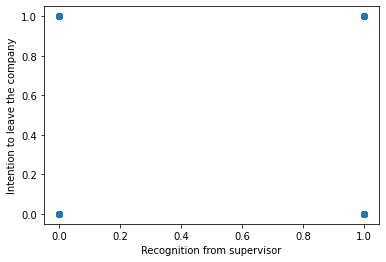

In [27]:
import matplotlib.pyplot as plt

# Select the predictor and target variables
X = df2["recog_sup"]
y = df2["all_turnover_intentions"]

# Create a scatterplot
plt.scatter(X, y)

# Add labels to the axes
plt.xlabel("Recognition from supervisor")
plt.ylabel("Intention to leave the company")

# Show the plot
plt.show()

job satisfaction dummies

- unfair treatment
- does unfair treatment affect job satisfaction, is reduction in satisfaction stronger for reciprocal peops

In [231]:
from sklearn.linear_model import LogisticRegression

# Select the predictor variables
X = df2[["recog_sup", "avg_rec", "interaction"]]

# Select the target variable
y = df2["satisfaction_work"]

# Use the OneHotEncoder to create dummy variables for the target variable
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1)).toarray()

# Create a list to store the coefficients for each class
coefficients = []

# Fit a separate logistic regression model for each class
for i in range(y_ohe.shape[1]):
    # Create a LogisticRegression model
    model = LogisticRegression()

    # Fit the model to the data for the current class
    model.fit(X, y_ohe[:, i])

    # Store the coefficients for the current class
    coefficients.append(model.coef_)

print(coefficients)


[array([[-0.14390126,  0.59318046, -0.4880346 ]]), array([[-0.06456214,  0.08438703, -0.20392355]]), array([[-0.00612575,  0.12421698, -0.14904783]]), array([[-0.40858501, -0.02670264,  0.04537817]]), array([[ 0.7291167 ,  0.24524304, -0.15583279]]), array([[-0.79239867,  0.01009022,  0.10931123]]), array([[-0.61337422, -0.20302439,  0.0639991 ]]), array([[ 0.49564474,  0.02435688, -0.00821801]]), array([[0.58507026, 0.10711314, 0.00130681]]), array([[ 0.05862672, -0.15343129, -0.09819715]])]


that is 10 regressions for each level of satisfaction

In [233]:
import statsmodels.api as sm

# Select the predictor variables
X = df2[["recog_sup", "avg_rec", "interaction"]]

# Select the target variable
y = df2["satisfaction_work"]

# Use the OneHotEncoder to create dummy variables for the target variable
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1)).toarray()

# Create a list to store the results for each class
results = []

# Fit a separate logistic regression model for each class
for i in range(y_ohe.shape[1]):
    # Add a constant term to the predictor variables
    X_with_constant = sm.add_constant(X)

    # Fit the logistic regression model
    model = sm.Logit(y_ohe[:, i], X_with_constant).fit()

    # Store the results for the current class
    results.append(model.summary())

# Print the results for each class
for result in results:
    print(result)


         Current function value: 0.015107
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.119534
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.130676
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.160218
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.233429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337115
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.513365
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579526
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.461075
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.235921
         Iterations 7
                

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Snapshot 2016 (df_snap)

In [332]:
df_snap = pd.merge(work16[["working_hours", "firmsize", 'school_degree']], df_16, 
                       left_on=["pid", "hid",], right_on=["pid", "hid"])

In [333]:
df_snap

,,working_hours,firmsize,school_degree,syear,gender,satisfaction_work,take_revenge,similar_problems,insult_back,overtime,overtime_paid,salary,recog_effort,recog_personal,recog_pay,felt_recog_sup,felt_recog_effort,felt_recog_pay,sector,year_birth
pid,hid,,,,,,,,,,,,,,,,,,,,
901,94,-2.0,[-2] trifft nicht zu,[1] Hauptschulabschluss,2016,[2] Weiblich,[-2] trifft nicht zu,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,-2,-2,-2,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,1951
1501,159,-2.0,[1] Unter 5,[4] Abitur,2016,[1] Maennlich,[8] 8 Zufrieden: Skala 0-Niedrig bis 10-Hoch,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,-2,-2,4166,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,1958
1601,167,-2.0,[-2] trifft nicht zu,[1] Hauptschulabschluss,2016,[1] Maennlich,[-2] trifft nicht zu,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,-2,-2,-2,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,1940
2301,230,-2.0,[-2] trifft nicht zu,[4] Abitur,2016,[1] Maennlich,[-2] trifft nicht zu,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,-2,-2,-2,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,1946
2302,65889,-2.0,[-2] trifft nicht zu,[4] Abitur,2016,[2] Weiblich,[-2] trifft nicht zu,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,-2,-2,-2,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,[-2] trifft nicht zu,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38647802,3864782,-2.0,[-2] trifft nicht zu,[5] Anderer Abschluss,2016,[2] Weiblich,[-5] In Fragebogenversion nicht enthalten,"[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)","[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)",[-1] keine Angabe,-5,-5,-2,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-2] trifft nicht zu,1981
38648101,3864812,-2.0,[-2] trifft nicht zu,[-2] trifft nicht zu,2016,[1] Maennlich,[-5] In Fragebogenversion nicht enthalten,"[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)","[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)","[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)",-5,-5,-2,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-2] trifft nicht zu,1962
38648301,3864839,-2.0,[-2] trifft nicht zu,[8] Keine Schule besucht,2016,[2] Weiblich,[-5] In Fragebogenversion nicht enthalten,"[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)","[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)","[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)",-5,-5,-2,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-5] In Fragebogenversion nicht enthalten,[-2] trifft nicht zu,1988


In [334]:
df_snap['gender'].replace('[2] Weiblich', 2,inplace=True)
df_snap['gender'].replace('[1] Maennlich', 1,inplace=True)

satisfaction_mapping_16 = {
    '[0] 0 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 0,
    '[1] 1 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 1,
    '[2] 2 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 2,
    '[3] 3 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 3,
    '[4] 4 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 4,
    '[5] 5 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 5,
    '[6] 6 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 6,
    '[7] 7 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 7,
    '[8] 8 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 8,
    '[9] 9 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 9,
    '[10] 10 Zufrieden: Skala 0-Niedrig bis 10-Hoch': 10,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[-5] In Fragebogenversion nicht enthalten': -5,
}

df_snap['satisfaction_work'].replace(satisfaction_mapping_16, inplace = True)


revenge_mapping_16 = {
    '[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)': 1,
    '[2] 2 auf Skala 1-7': 2,
    '[3] 3 auf Skala 1-7': 3,
    '[4] 4 auf Skala 1-7': 4,
    '[5] 5 auf Skala 1-7': 5,
    '[6] 6 auf Skala 1-7': 6,
    '[7] 7 Trifft voll zu, (Skala 1-7)': 7,
    '[-1] keine Angabe': -1,
    '[-2] trifft nicht zu': -2,
    '[-5] In Fragebogenversion nicht enthalten': -5,
}

df_snap['take_revenge'].replace(revenge_mapping_16, inplace=True)


similar_problems_mapping_16 = {
    '[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)': 1,
    '[2] 2 auf Skala 1-7': 2,
    '[3] 3 auf Skala 1-7': 3,
    '[4] 4 auf Skala 1-7': 4,
    '[5] 5 auf Skala 1-7': 5,
    '[6] 6 auf Skala 1-7': 6,
    '[7] 7 Trifft voll zu, (Skala 1-7)': 7,
    '[-1] keine Angabe': -1,
    '[-2] trifft nicht zu': -2,
    '[-5] In Fragebogenversion nicht enthalten': -5,
}

df_snap['similar_problems'].replace(similar_problems_mapping_16, inplace = True)


insult_back_mapping_16 = {
    '[1] 1 Trifft ueberhaupt nicht zu, (Skala 1-7)': 1,
    '[2] 2 auf Skala 1-7': 2,
    '[3] 3 auf Skala 1-7': 3,
    '[4] 4 auf Skala 1-7': 4,
    '[5] 5 auf Skala 1-7': 5,
    '[6] 6 auf Skala 1-7': 6,
    '[7] 7 Trifft voll zu, (Skala 1-7)': 7,
    '[-1] keine Angabe': -1,
    '[-2] trifft nicht zu': -2,
    '[-5] In Fragebogenversion nicht enthalten': -5,
}

df_snap['insult_back'].replace(insult_back_mapping_16, inplace= True)

school_degree_mapping_16 = {
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe':-1,
    '[1] Hauptschulabschluss': 1,
    '[2] Realschulabschluss': 2,
    '[3] Fachhochschulreife': 3,
    '[4] Abitur': 4,
    '[5] Anderer Abschluss': 5,
    '[6] Ohne Abschluss verlassen': 6,
    '[7] Noch kein Abschluss': 7,
    '[8] Keine Schule besucht': 8,
    
}

df_snap['school_degree'].replace(school_degree_mapping_16, inplace=True)

recog_effort_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten':-5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}
df_snap['recog_effort'].replace(recog_effort_mapping_16, inplace=True)

recog_personal_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten':-5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}

df_snap['recog_personal'].replace(recog_personal_mapping_16, inplace=True)

recog_pay_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten':-5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Ja': 1,
    '[2] Nein': 2,
}

df_snap['recog_pay'].replace(recog_pay_mapping_16, inplace=True)

felt_recog_effort_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten': -5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df_snap['felt_recog_effort'].replace(felt_recog_effort_mapping_16, inplace=True)

felt_recog_sup_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten': -5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df_snap['felt_recog_sup'].replace(felt_recog_sup_mapping_16, inplace=True)

felt_recog_pay_mapping_16= {
    '[-5] In Fragebogenversion nicht enthalten': -5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Gar nicht': 1,
    '[2] Maessig': 2,
    '[3] Stark': 3,
    '[4] Sehr stark': 4,
}

df_snap['felt_recog_pay'].replace(felt_recog_pay_mapping_16, inplace=True)

firmsize_mapping_16 = {
    '[-5] In Fragebogenversion nicht enthalten': -5,
    '[-2] trifft nicht zu': -2,
    '[-1] keine Angabe': -1,
    '[1] Unter  5': 1,
    '[2] 5 bis 10': 2,
    '[3] 11 bis unter 20': 3,
    '[4] bis 90: unter 20': 4,
    '[5] 91-04: 5 bis unter 20': 5,
    '[6] 20 bis unter 100': 6,
    '[7] 100 bis unter 200': 7,
    '[8] bis 98: 20 bis unter 200': 8,
    '[9] 200 bis unter 2000': 9,
    '[10] 2000 und mehr': 10,
    '[11] Selbstaendig-ohne Mitarb.': 11,
}

df_snap['firmsize'].replace(firmsize_mapping_16, inplace=True)


sector_map = {
    "[1] Landwirtschaft und  Jagd": 1,
    "[2] Forstwirtschaft": 2,
    "[5] Fischerei, Fischzucht": 5,
    "[10] Kohlenbergbau, Torfgewinnung": 10,
    "[11] Gewinnung von Erdoel, Erdgas": 11,
    "[12] Bergbau auf Uran- und Thoriumerze": 12,
    "[13] Erzbergbau": 13,
    "[14] Gewinnung von Steinen und Erden, sonstiger Bergbau": 14,
    "[15] Herstellung von Nahrungs- und Futtermitteln sowie Getränken": 15,
    "[16] Tabakverarbeitung": 16,
    "[17] Herstellung von Textilien": 17,
    "[18] Herstellung von Bekleidung": 18,
    "[19] Herstellung von Leder und Lederwaren": 19,
    "[20] Herstellung von Holz sowie Holz-, Kork- und Flechtwaren (ohne Herstellung von Möbeln)": 20,
    "[21] Herstellung von Papier, Pappe und Waren daraus": 21,
    '[22] Herstellung von Verlags- und Druckerzeugnissen,  Vervielfältigung von bespielten Ton-, Bild- und Datenträgern': 22,
    "[23] Kokerei, Mineralölverarbeitung, Herstellung und Verarbeitung von Spalt- und Brutstoffen": 23,
    "[24] Herstellung von chemischen Erzeugnissen": 24,
    "[25] Herstellung von Gummi- und Kunststoffwaren": 25,
    "[26] Herstellung von Glas und Glaswaren, Keramik, Verarbeitung von Steinen und Erden": 26,
    "[27] Metallerzeugung und -bearbeitung": 27,
    "[28] Herstellung von Metallerzeugnissen": 28,
    "[29] Maschinenbau": 29,
    "[31] Herstellung von Geräten der Elektrizitätserzeugung, -verteilung u. Ä.": 31,
    "[30] Herstellung von Büromaschinen, Datenverarbeitungsgeräten und -einrichtungen": 30,
    "[32] Rundfunk- und Nachrichtentechnik": 32,
    "[33] Medizin-, Mess-, Steuer- und Regelungstechnik, Optik, Herstellung von Uhren": 33,
    "[34] Herstellung von Kraftwagen und Kraftwagenteilen": 34,
    "[35] Sonstiger Fahrzeugbau": 35,
    "[36] Herstellung von Möbeln, Schmuck, Musikinstrumenten, Sportgeräten, Spielwaren und sonstigen Erzeugnissen": 36,
    "[37] Rückgewinnung": 37,
    "[40] Energieversorgung": 40,
    "[41] Wasserversorgung": 41,
    "[45] Bau": 45,
    "[50] Kraftfahrzeughandel; Instandhaltung und Reparatur von Kraftfahrzeugen; Tankstellen": 50,
    "[51] Handelsvermittlung und Großhandel (ohne Handel mit Kraftfahrzeugen)": 51,
    "[52] Einzelhandel (ohne Handel mit Kraftfahrzeugen und ohne Tankstellen); Reparatur von Gebrauchsgütern": 52,
    "[55] Beherbergungs- und Gaststätten": 55,
    "[60] Landverkehr; Transport in Rohrfernleitungen": 60,
    "[61] Schifffahrt": 61,
    "[62] Luftfahrt": 62,
    "[63] Hilfs- und Nebentätigkeiten für den Verkehr; Verkehrsvermittlung": 63,
    "[64] Nachrichtenübermittlung": 64,
    "[65] Kreditinstitute": 65,
    "[66] Versicherungen (ohne Sozialversicherung)": 66,
    "[67] Mit den Kreditinstituten und Versicherungen verbundene Tätigkeiten": 67,
    "[70] Grundstücks- und Wohnungswesen": 70,
    "[71] Vermietung beweglicher Sachen ohne Bedienungspersonal": 71,
    "[72] Datenverarbeitung und Datenbanken": 72,
    "[73] Forschung und Entwicklung": 73,
    "[74] Erbringung von unternehmensbezogenen Dienstleistungen": 74,
    "[75] Öffentliche Verwaltung, Verteidigung, Sozialversicherung": 75,
    "[80] Erziehung und Unterricht": 80,
    "[85] Gesundheits-, Veterinär- und Sozialwesen": 85,
    "[90] Abwasser- und Abfallbeseitigung und sonstige Entsorgung": 90,
    "[91] Interessenvertretungen sowie kirchliche und sonstige Vereinigungen (ohne Sozialwesen, Kultur und Sport)": 91,
    "[92] Kultur, Sport und Unterhaltung": 92,
    "[93] Erbringung von sonstigen Dienstleistungen": 93,
    "[95] Private Haushalte mit Hauspersonal": 95,					
    "[96] Industrie - ohne weitere Zuordnung": 96,					
    "[97] Handwerk - ohne weitere Zuordnung": 97,					
    "[98] Dienstleistungen ohne weitere Zuordnung": 98,					
    "[99] Exterritoriale Organisationen und Körperschaften": 99,				
    "[100] Produzierendes Gewerbe ohne w.Zuordnung": 100,
    "[-1] keine Angabe": -1,
    '[-2] trifft nicht zu': -2, 
    "[-3] unplausibler Wert": -3,
    "[-4] unzulaessige Mehrfachantwort": -4, 
    "[-5] in Fragebogenversion nicht enthalten": -5,
    "[-6] Fragebogenversion mit geaenderter Filterfuehrung": -6, 
    "[-7] nur in weniger eingeschraenkter Edition verfuegbar": -7,
    "[-8] Frage in diesem Jahr nicht Teil des Frageprogramms": 8,
}
df_snap['sector'].replace(sector_map, inplace=True)

In [335]:
df_snap = df_snap.astype('int')
df1_snap= df_snap.mask(df_snap < 0, np.nan)

In [336]:
column_names_16 = df1_snap.columns

# Create a list of columns to be updated
columns_to_update = [col for col in column_names_16 if col not in ['syear', 'year_birth', 'overtime', 'overime_paid', 'salary']]

# Replace NA values with 0 for the selected columns
df1_snap[columns_to_update] = df1_snap[columns_to_update].fillna(0)

In [337]:
int_columns_16 = ['gender', 'take_revenge', 'similar_problems', 'insult_back','recog_effort', 'recog_personal', 'recog_pay', 'school_degree','satisfaction_work', 'firmsize', "felt_recog_pay", "felt_recog_sup", "felt_recog_effort", "sector"]

for col in int_columns_16:
    df1_snap[col] = df1_snap[col].astype('int')

category_columns_16 = ['gender', 'take_revenge', 'similar_problems', 'insult_back','recog_effort', 'recog_personal', 'recog_pay', 'school_degree','satisfaction_work', 'firmsize', "felt_recog_pay", "felt_recog_sup", "felt_recog_effort", "sector"]

for col in category_columns_16:
    df1_snap[col] = df1_snap[col].astype('category')

In [338]:
df1_snap

,,working_hours,firmsize,school_degree,syear,gender,satisfaction_work,take_revenge,similar_problems,insult_back,overtime,overtime_paid,salary,recog_effort,recog_personal,recog_pay,felt_recog_sup,felt_recog_effort,felt_recog_pay,sector,year_birth
pid,hid,,,,,,,,,,,,,,,,,,,,
901,94,0.0,0,1,2016,2,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,1951.0
1501,159,0.0,1,4,2016,1,8,0,0,0,NaN,0.0,4166.0,0,0,0,0,0,0,0,1958.0
1601,167,0.0,0,1,2016,1,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,1940.0
2301,230,0.0,0,4,2016,1,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,1946.0
2302,65889,0.0,0,4,2016,2,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,1946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38647802,3864782,0.0,0,5,2016,2,0,1,1,0,NaN,0.0,NaN,0,0,0,0,0,0,0,1981.0
38648101,3864812,0.0,0,0,2016,1,0,1,1,1,NaN,0.0,NaN,0,0,0,0,0,0,0,1962.0
38648301,3864839,0.0,0,8,2016,2,0,1,1,1,NaN,0.0,NaN,0,0,0,0,0,0,0,1988.0


In [339]:
df1_snap = df1_snap.where(~df1_snap.eq(0), np.nan)

In [340]:
df1_snap['avg_rec'] = df1_snap[['take_revenge', 'similar_problems', 'insult_back']].mean(axis=1)
df1_snap['overtime_unpaid'] = df1_snap['overtime'] - df1_snap['overtime_paid']
df1_snap['age'] = df1_snap['syear'] - df1_snap['year_birth']
df1_snap["potential_experience"] = pow((df1_snap["age"] - 18), 2)

In [341]:
df1_snap

,,working_hours,firmsize,school_degree,syear,gender,satisfaction_work,take_revenge,similar_problems,insult_back,overtime,...,recog_pay,felt_recog_sup,felt_recog_effort,felt_recog_pay,sector,year_birth,avg_rec,overtime_unpaid,age,potential_experience
pid,hid,,,,,,,,,,,,,,,,,,,,,
901,94,NaN,NaN,1,2016,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,65.0,2209.0
1501,159,NaN,1,4,2016,1,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1958.0,NaN,NaN,58.0,1600.0
1601,167,NaN,NaN,1,2016,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1940.0,NaN,NaN,76.0,3364.0
2301,230,NaN,NaN,4,2016,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1946.0,NaN,NaN,70.0,2704.0
2302,65889,NaN,NaN,4,2016,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1946.0,NaN,NaN,70.0,2704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38647802,3864782,NaN,NaN,5,2016,2,NaN,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1981.0,1.000000,NaN,35.0,289.0
38648101,3864812,NaN,NaN,NaN,2016,1,NaN,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1962.0,1.000000,NaN,54.0,1296.0
38648301,3864839,NaN,NaN,8,2016,2,NaN,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1988.0,1.000000,NaN,28.0,100.0


created dummies for gender, sectors, recognition, not sure if we need it though

In [265]:
dummy_df = pd.get_dummies(df1_snap['felt_recog_effort'])

In [284]:
dummy_gender = pd.get_dummies(df1_snap['gender'])

In [290]:
dummy_sector = pd.get_dummies(df1_snap['sector'])

create interaction terms between felt regognition effort and the average egative reciprocity 

For now I create the sector salary averages with the given data, couldnt find data for this in 2016... als, maybe we do the mince regression 

In [342]:
sector_salary_averages = df1_snap.groupby('sector')['salary'].mean()
#sector_agg = df1_snap.groupby('sector').agg({'salary': ['mean', 'median', 'std']})


calculate individual's wage relative to the sector average

In [343]:
df1_snap["sector_avg_salary"] = df1_snap["sector"].map(sector_salary_averages)
df1_snap["relative_salary"] = df1_snap["salary"] / df1_snap["sector_avg_salary"]

- we need the interaction reciprocity x recognition
- then, we should have everything for the first regression (outcome ~ reciprocity x recognition + reciprocity  recognition + controls (age, gender, sector, salary/sector))
- unpaid overtime (work effort/ motivation) as first outcome due to the mentioned problems with turnover intentions

In [37]:
'''primitive first attempt of this mincer regression

y = np.log(df1["salary"])

fit = ols('y ~ C(gender) + C(firmsize) + C(school_degree) + potential_experience', data=df1).fit() 
fit.summary()

??? '''